### Prueba 1 - Hito 1 - Javier Rojas Benitez - G56

# Preliminares

- Este es un problema de clasificacion. En especifico, corresponde a un problema de clasificacion
binaria. Esto, ya que se quiere clasificar si un cuerpo de texto tiene un sentimiento negativo o positivo asociado.

- En resumen, es un problema donde se quiere relacionar el contenido de un
cuerpo de texto (variables independientes) con el sentimiento asociado al mismo (vector objetivo).

## Variables disponibles

- El vector objetivo (```sentiment```) corresponde al sentimiento asociado a un cuerpo de texto.
Existen diversos sentimientos disponibles. Sin embargo, esta variable sera codificada a una variable
binaria (Positivo o Negativo). La codificacion esta explicada en el apartado de preprocesamiento.

- Las variables independientes corresponden a todas las palabras disponibles en cada cuerpo de texto.
Sin embargo, una parte importante de estas palabras seran filtradas luego del preprocesamiento 
(eliminacion de palabras "stopwords", consolidacion de palabras con una raiz comun). Por lo tanto,
los variable independientes disponibles corresponderán a las palabras remanentes en los cuerpos de texto luego del preprocesamiento.

## Resolución del problema

- Como se menciono previamente, este es un problema de clasificacion. En este caso, se relaciona
el contenido de un texto con el sentimiento (especificamente, si es un sentimiento positivo o negativo)
que este provoca.

- Especificamente, este es un problema de clasificacion binaria (positivo o negativo). Debido a lo
anterior, se utilizaran los siguientes modelos predictivos:

    - Regresion logistica
    - Arbol de Clasificacion
    - Random Forest de Clasificacion
    - SVM
    - Naive Bayes

- Para cada modelo se realizará una búsqueda de hiperparámetros óptimos en grilla. La grilla
utilizada para cada modelo será la siguiente:

- **Regresion Logistica:**
    - **C**: Se modificara este parametro, ya que permite modificar la fuerza de la regularizacion del
    modelo. Valores mas altos aumentan la varianza del modelo (mayor chance de overfitting), valores
    mas bajos aumentan el sesgo del modelo (mayor chance de generalizacion, menos overfitting). Se
    utilizaran los siguientes valores:
    ```python
    np.logspace(-4, 4, 20)
    ```


    - **Solver**: Se modificara este parametro, ya que permite modifiar el algoritmo de optimizacion
    para crear la curva de regresion logistica. Esto se traduce en modelos mas/menos exactos. Se utilizaran los siguientes valores: 
    ```python
    ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    ```

    - **Penalty**: Se modificara este parametro, ya que permite modificar el tipo de regularizador (L2 o L1) a utilizar.  Se utilizaran los siguientes valores:

    ```python
    ['l1', 'l2', 'elasticnet']
    ```

- Arbol de Clasificacion:
    - **max_depth**: Se modificara este parametro, ya que modifica cuantos niveles puede tener un
    arbol. Un arbol con muchos niveles puede incurrir en el overfitting. Se utilizaran los siguientes
    valores:
    ```python
    range(3, 10)
    ```
    - **max_leaf_nodes**: Se modificara este parametro, ya que permitira controlar la cantidad de
    nodos hoja. Esto evitara el overfitting. Se utilizaran los siguientes
    valores:
    ```python
    range(1, 5)
    ```
    - **criterion**: Este parametro permitira cambiar el modo en el que se calcula la impureza de
    una division. Se utilizaran los siguientes valores:
    ```python
    ['gini', 'entropy']
    ```


- Random Forest de Clasificacion:
    - **max_depth**: Se modificara este parametro, ya que modifica cuantos niveles puede tener un
    arbol. Un arbol con muchos niveles puede incurrir en el overfitting. Se utilizaran los siguientes
    valores:
    ```python
    range(3, 10)
    ```

    - **n_estimators**: Es la cantidad de arboles que existen en el ensamble de arboles. Una mayor cantidad
    de arboles aumenta la exactitud de la prediccion, pero es mas costoso computacionalmente. Se utilizaran los siguientes valores:

    ```python
    range(100, 1000, 100)
    ```

    - **max_features**: Es la cantidad de variables independientes a utilizar para cada division en el
    arbol. Se utilizaran los siguientes valores:
    ```python
    ['sqrt', 'log2', None]
    ```

- SVM
- Naive Bayes



El flujo general de la resolución del problema será la siguiente:

1. **Análisis exploratorio de los datos y preprocesamiento**
    1. Analizar la distribucion y valores faltantes del vector objetivo
    2. Recodificar el vector objetivo ([Preprocesamiento vector objetivo](#vector-objetivo))
    3. Analizar la distribucion y valores faltantes del vector objetivo recodificado
    4. Preprocesar todos los cuerpos de texto de la base de datos ([Preprocesar variables independiente](#variables-independientes))
    5. Analizar la distribucion de palabras y valores faltantes de los cuerpos de texto preprocesados

2. **Separación de datos en entrenamiento y validación**
    1. Se separarán los datos en variables independientes y vector objetivo
    2. Se separarán ambos tipos de variables en datos de entrenamiento y validación (Se utilizará
    el 33.5% de los datos para la validación)

3. **Búsqueda de parámetros óptimos para modelos de Machine Learning**
    1. Se realizará un GridSearchCV para cada uno de los modelos listado, utilizando la grilla
    adjunta previamente para cada modelo.
    2. Se obtendrán los parámetros óptimos de cada tipo de modelo creado

4. **Validación y elección de modelos optimizados**
    1. Cada uno de los modelos con sus parámetros optimizados se validará con los datos de
    validación de la división trietápica.
    2. Finalmente, se comparará el desempeño de cada modelo y se elegirá el mejor de todos
    según la métrica de ROC-AUC.


## Preprocesamiento

- Debido a que este es un problema de análisis de textos, es necesario preprocesar los cuerpos de
texto a analizar. Se seguirán los siguientes pasos para realizar el preprocesamiento:

### Vector objetivo

1. Se reemplazará cada sentimiento por su codificación a positivo o negativo según el enunciado. 
El valor positivo será asignado con el número 1, y el valor negativo con el número 0.
2. Los sentimientos neutros seran asignados eligiendo un valor aleatorio entre 1 (Positivo) o 0 (Negativo)
Esto se realizará utilizando la función .choice(list) del módulo random (o sea: ```random.choice([0, 1])``` para cada ocurrencia de "neutral").
3. Se eliminará de la base de datos la columna original de sentimientos


### Variables independientes

1. Se convertirán las letras a lower case (con la función lower)
2. Se filtrarán todas las palabras comúnes (filtrando todas las palabras que existan en la lista
de stopwords de nltk)
3. Se realizará una lemantización de cada cuerpo de texto presente
4. Se creará una matriz de ocurrencias de cada palabra en cada texto con CountVectorizer


## Division de muestras

- Una vez realizado todo el preprocesamiento, se dividirá la base de datos en un set de datos de
entrenamiento y de validación. Se utilizará un ***33.5% de los datos para validación***, y ***el otro 66.5%
para entrenar los modelos***

- El set de entrenamiento será utilizado para realizar un GridSearch con Validación Cruzada
para cada modelo (Por lo tanto, se utilizará una división trietápica). Se utilizarán 5 validaciones
cruzadas para cada búsqueda en grilla.


## Métricas de Desempeño

- Para cada una de las validaciones cruzadas durante del GridSearchCV, se calculará la métrica
de accuracy

- Para la validación de cada modelo con el conjunto de datos de testeo se calcularán las métricas
de recall, precision, accuracy y f1-score (con la función ```classification_report``` de
sklearn.metrics). Además, se calculará el ROC-AUC Score para discernir qué modelo es el más
óptimo.


## Optimización del Modelo

- Se utilizará una búsqueda en grilla para elegir los hiperparámetros más óptimos de cada uno de los
modelos disponibles.

- Durante la validación de cada uno de los modelos, se utilizará la métrica de ROC-AUC Score
para elegir el modelo más óptimo disponible.


# Aspectos Computacionales
- Se utiliza la siguiente version de Python:

    - Python v3.10.9

- Se utilizaran las siguientes librerias:
  - **Para sanitizar el cuadernillo jupyter**:
    - warnings de Python v3.10.9
  
  - **Para leer/manipular bases de datos y calcular diversas estadisticas**:
    - pandas v1.4.4
    - numpy v1.21.5
  
  - **Para graficar datos**:
    - matplotlib v3.5.2
    - seaborn v0.11.2
  
  - **Para observar visualmente valores faltantes**:
    - missingno v0.4.2

  - **Funciones auxiliares (alojadas en los archivos llamado funciones_auxiliares_hito_X.py)**



# Análisis Exploratorio

In [6]:
import importlib
import random

import pandas as pd
import numpy as np
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

import funciones_auxiliares as aux

import warnings

warnings.filterwarnings("ignore")
sns.set_style()
plt.rcParams["figure.figsize"] = (12, 6)

importlib.reload(aux)

<module 'funciones_auxiliares' from 'c:\\Users\\ppizarro\\Desktop\\Javier Rojas\\Javier\\propio\\personal\\G56\\machine-learning\\prueba\\prueba_1\\hito_1\\funciones_auxiliares.py'>

In [2]:
df = pd.read_csv("input/training_tweets.csv").drop(columns="Unnamed: 0")

# Análisis de vector objetivo

,Frecuencia,Porcentaje
neutral,6451,0.215033
worry,6337,0.211233
happiness,3952,0.131733
sadness,3869,0.128967
love,2908,0.096933
surprise,1619,0.053967
fun,1331,0.044367
relief,1158,0.038600
hate,975,0.032500
empty,617,0.020567


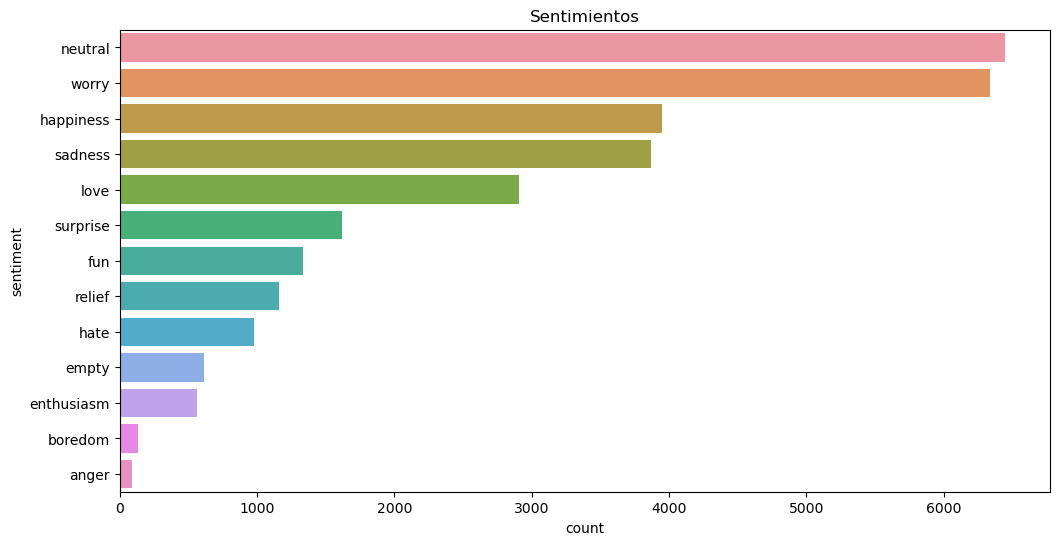

,cantidad_na,porcentaje_na
sentiment,0,0.0


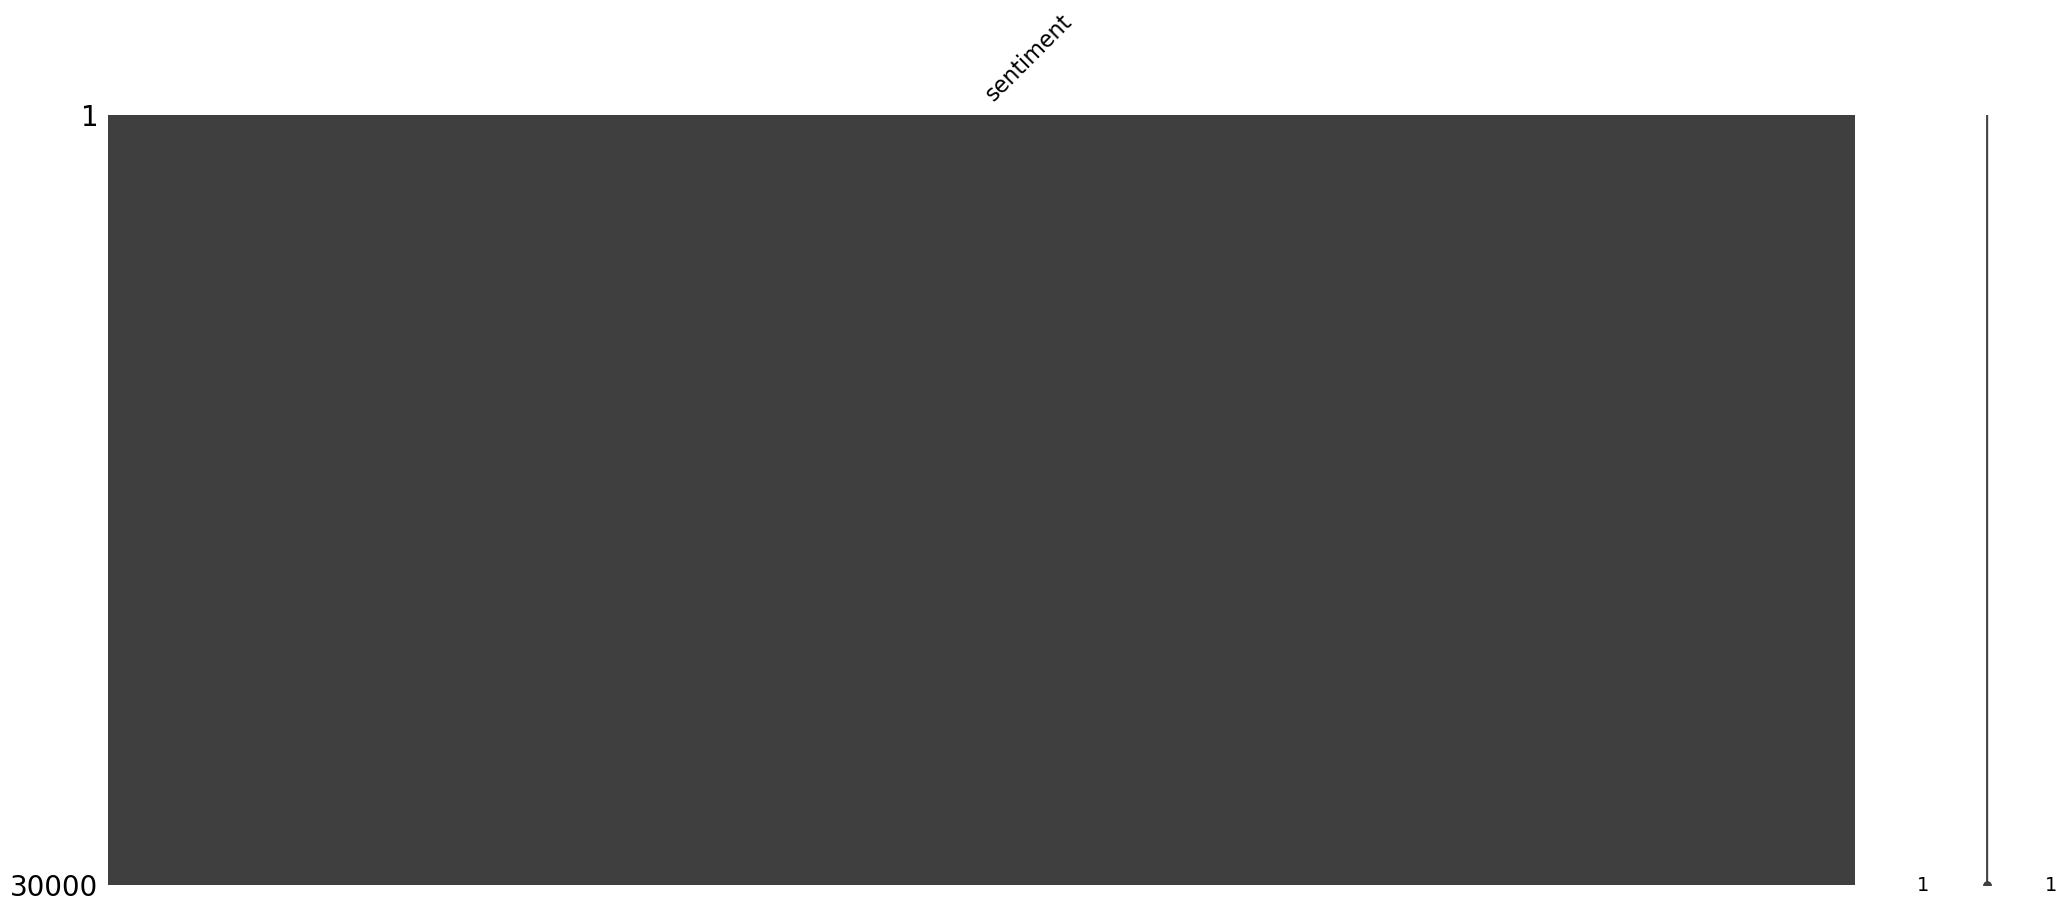

In [5]:
vector_objetivo = df["sentiment"]
aux.graficar_distribucion_variable_categorica(vector_objetivo, "Sentimientos")
aux.analizar_valores_faltantes(vector_objetivo.to_frame())

- La variable presentó 6451 textos neutrales, que corresponden al 21.5% de los textos totales de la
base de datos. Este sentimiento es el más frecuente en toda la base de datos. Es altamente
relevante que neutral tenga la mayor frecuencia, ya que será codificado aleatoriamente hacia un 
sentimiento positivo o negativo. Esto podría generar un sesgo hacia un sentimiento negativo o positivo.
Sin embargo, como se utilizará un proceso aleatorio, es esperable que se asigné homogéneamente la
cantidad de sentimientos positivos y negativos.

- Exceptuando neutral, worry fue el sentimiento más frecuente en la base de datos. Aparece
6337 veces, lo que correspondiente al 21.1% de los textos en la base de datos.

- La variable presentó 89 textos clasificados con el sentimiento anger, correspondiente al 0.3%
de los textos totales de la base de datos. Este sentimiento es el menos frecuente en toda la base
de datos.

- El vector objetivo carece de algún valor faltante. Por lo tanto, es innecesario implementar una
técnica para eliminar filas/rellenar valores faltantes.

# Preprocesamiento

Ya habiendo observado las tendencias del vector objetivo original, se procederá a recodificar
esta variable según el enunciado.

## Vector objetivo

Recordemos que el sentimiento negativo será representado con el número 0, y el sentimiento positivo
con el número 1. Por lo tanto:

- Negativo = 0
- Positivo = 1

In [7]:
random.seed(1)

DICCIONARIO_REEMPLAZO = {
    "worry": 0,
    "happiness": 1,
    "sadness": 0,
    "love": 1,
    "surprise": 1,
    "fun": 1,
    "relief": 1,
    "hate": 0,
    "empty": 0,
    "enthusiasm": 1,
    "boredom": 0,
    "anger": 0
}

vector_objetivo_codificado = vector_objetivo.replace(DICCIONARIO_REEMPLAZO)

Posteriormente, se codificará el sentimiento neutral aleatoriamente.

In [8]:
neutrales = vector_objetivo_codificado[vector_objetivo_codificado == 'neutral']
neutrales = neutrales.apply(lambda x: random.choice([0, 1]))
vector_objetivo_codificado.iloc[neutrales.index] = neutrales

En este punto ya se tiene el vector codificado completamente. Por lo tanto, se puede observar
la tendencia de la variable posterior a su codificación.

,Frecuencia,Porcentaje
0,15229,0.507633
1,14771,0.492367


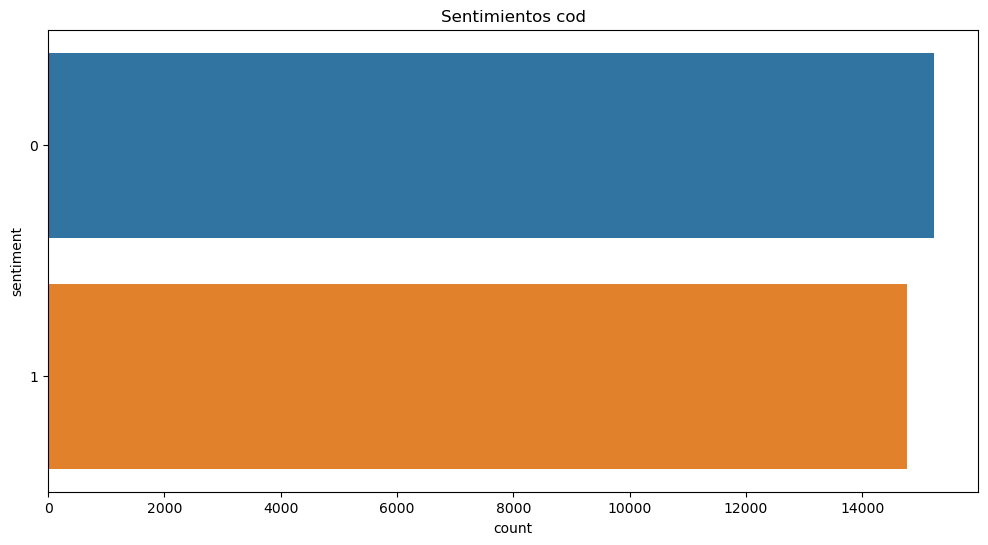

In [10]:
aux.graficar_distribucion_variable_categorica(vector_objetivo_codificado, "Sentimientos cod")

- Se observa que la variable presenta un leve sesgo hacia los sentimientos negativos (0), con
15229 textos clasificados con este sentimiento, lo que corresponde al 50.76% del total de textos.

- Por otro lado, se clasificaron 14771 (49.24% del total) texos con sentimientos positivos.

La codificación del vector objetivo será modularizada en la siguiente función:

In [11]:
random.seed(1)

DICCIONARIO_REEMPLAZO = {
    "worry": 0,
    "happiness": 1,
    "sadness": 0,
    "love": 1,
    "surprise": 1,
    "fun": 1,
    "relief": 1,
    "hate": 0,
    "empty": 0,
    "enthusiasm": 1,
    "boredom": 0,
    "anger": 0
}

def codificar_sentimientos(vector_objetivo):
    vector_objetivo_codificado = vector_objetivo.replace(DICCIONARIO_REEMPLAZO)
    neutrales = vector_objetivo_codificado[vector_objetivo_codificado == 'neutral']
    neutrales = neutrales.apply(lambda x: random.choice([0, 1]))
    vector_objetivo_codificado.iloc[neutrales.index] = neutrales

    return vector_objetivo_codificado